# Chapter 2 Problems - Python

## Load Libraries

In [27]:
#### Install the libraries - Only needs to be done once
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install statsmodels
# !pip3 install xlrd
!pip3 install matplotlib

    100% |████████████████████████████████| 10.3MB 151kB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 1.2MB/s ta 0:00:011
    100% |████████████████████████████████| 3.0MB 495kB/s eta 0:00:01


## 2.1

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import xlrd
import os

In [32]:
wb = xlrd.open_workbook('../linear_regression_5e_data_sets/Appendices/data-table-B1.XLS', logfile=open(os.devnull, 'w'))
df = pd.read_excel(wb, engine='xlrd')

In [33]:
df = df[['y','x8']]
df = df.rename(columns={'x8':'x'})
y = df['y'].to_numpy()
x = df['x'].to_numpy()

In [5]:
x = sm.add_constant(x)

In [6]:
model = sm.OLS(y, x)
results = model.fit()

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     31.10
Date:                Sat, 24 Jul 2021   Prob (F-statistic):           7.38e-06
Time:                        19:33:21   Log-Likelihood:                -63.123
No. Observations:                  28   AIC:                             130.2
Df Residuals:                      26   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7883      2.696      8.081      0.0

In [8]:
results.mse_resid

5.725845084730775

In [9]:
results.mse_model

178.09231351128557

In [10]:
results.ssr

148.87197220300015

In [11]:
results.ess

178.09231351128557

In [12]:
# Equation
results.params
# Clean Up Printing...

array([ 2.17882509e+01, -7.02510028e-03])

In [13]:
results.conf_int

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x78b20236a208>>

In [14]:
# Calculate a new value
newx = 2000
predictions = results.get_prediction([1,newx])

In [15]:
# 
predictions.summary_frame(.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.73805,0.473015,6.765753,8.710348,2.724248,12.751852


In [16]:
results.conf_int(alpha=0.05)[1]

array([-0.00961435, -0.00443585])

In [17]:
np.max(x)

2876.0

In [18]:
print(np.max(x[:,1]))

2876.0


In [19]:
print(np.min(x[:,1]))

1457.0


In [20]:
min_x = np.min(x[:,1])
max_x = np.max(x[:,1])
interval_x = np.arange(min_x,max_x,(max_x - min_x)/100)

In [21]:
interval_x

array([1457.  , 1471.19, 1485.38, 1499.57, 1513.76, 1527.95, 1542.14,
       1556.33, 1570.52, 1584.71, 1598.9 , 1613.09, 1627.28, 1641.47,
       1655.66, 1669.85, 1684.04, 1698.23, 1712.42, 1726.61, 1740.8 ,
       1754.99, 1769.18, 1783.37, 1797.56, 1811.75, 1825.94, 1840.13,
       1854.32, 1868.51, 1882.7 , 1896.89, 1911.08, 1925.27, 1939.46,
       1953.65, 1967.84, 1982.03, 1996.22, 2010.41, 2024.6 , 2038.79,
       2052.98, 2067.17, 2081.36, 2095.55, 2109.74, 2123.93, 2138.12,
       2152.31, 2166.5 , 2180.69, 2194.88, 2209.07, 2223.26, 2237.45,
       2251.64, 2265.83, 2280.02, 2294.21, 2308.4 , 2322.59, 2336.78,
       2350.97, 2365.16, 2379.35, 2393.54, 2407.73, 2421.92, 2436.11,
       2450.3 , 2464.49, 2478.68, 2492.87, 2507.06, 2521.25, 2535.44,
       2549.63, 2563.82, 2578.01, 2592.2 , 2606.39, 2620.58, 2634.77,
       2648.96, 2663.15, 2677.34, 2691.53, 2705.72, 2719.91, 2734.1 ,
       2748.29, 2762.48, 2776.67, 2790.86, 2805.05, 2819.24, 2833.43,
       2847.62, 2861

In [22]:
interval_x = sm.add_constant(interval_x)

In [23]:
predictions = results.get_prediction(interval_x)

In [51]:
predictions.summary_frame(0.05)['mean_ci_lower']

0     9.622910
1     9.555339
2     9.487598
3     9.419677
4     9.351567
        ...   
95    0.057287
96   -0.075111
97   -0.207643
98   -0.340302
99   -0.473084
Name: mean_ci_lower, Length: 100, dtype: float64

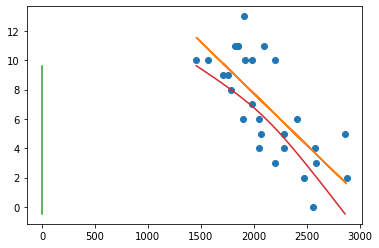

In [56]:
from matplotlib import pyplot as plt
import numpy as np
# Create the data set
#x = np.arange(0, 10, 0.05)
#y = np.sin(x)
# Define the confidence interval
#ci = 0.1 * np.std(y) / np.mean(y)
# Plot the sinus function
plt.plot(x, y, 'o')



plt.plot(x, results.params[1]*x + results.params[0])

plt.plot(interval_x,predictions.summary_frame(0.05)['mean_ci_lower'])
#plt.plot(interval_x,predictions.summary_frame(0.05)['mean_ci_upper'])
#plt.plot()

# Plot the confidence interval
#plt.fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.1)
#plt.fill_between(results.params[1]*x + results.params[0], predictions.summary_frame(0.05)['mean_ci_lower'], color='blue')
plt.show()

ValueError: x and y must be the same size

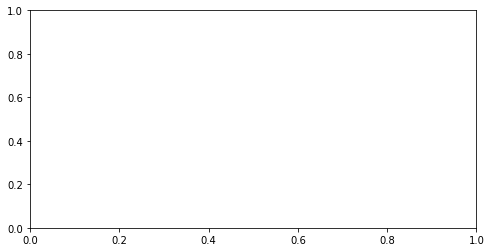

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Scatter Plot')
fig.tight_layout(pad=2); 
ax.grid(True)
fig.savefig('filename1.png', dpi=125)

In [57]:
 import statsmodels.api as sm

x = sm.add_constant(x) # constant intercept term
# Model: y ~ x + c
model = sm.OLS(y, x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-', color='darkorchid', linewidth=2)

NameError: name 'ax' is not defined